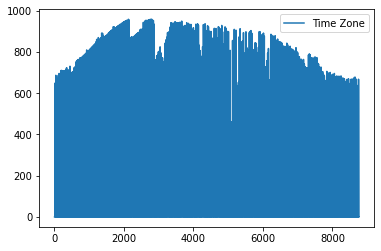

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df= pd.read_csv('13395_24.55_71.05_2004.csv', usecols=['Time Zone']) #Data of GHI is present in Time zone,
df= df.drop(0)                                                       # so we dropped first two values
df= df.drop(1)
df.size
df=df.astype(int)
df.plot()

df_values= df.values

In [ ]:
df.size
#print(df)

8760

In [ ]:
df.describe()

,Time Zone
count,8760.000000
mean,227.693493
std,302.499618
min,0.000000
25%,0.000000
50%,0.000000
75%,479.000000
max,959.000000


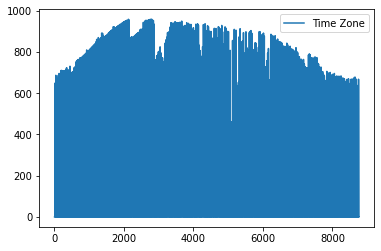

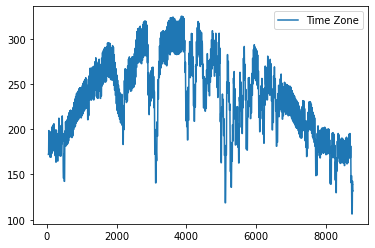

In [ ]:
df_mean= df.rolling(window=50).mean()
df.plot()
df_mean.plot( )

Base Line Model

In [ ]:
value = pd.DataFrame(df_values)

speed_df = pd.concat([value, value.shift(1)], axis=1)

speed_df.columns = ['Actual','Forecast']
speed_df.columns

from sklearn.metrics import mean_squared_error
import numpy as np

speed_test= speed_df[1:]


In [ ]:
speed_error= mean_squared_error(speed_test.Actual,speed_test.Forecast)
speed_error

12440.34752825665

In [ ]:
np.sqrt(speed_error)

111.53630587506765

ARIMA Model and ACF, PACF

In [ ]:
df_train= df[0:7500]
df_test= df[7500:8760]
df_train.size
df_test.size

1260

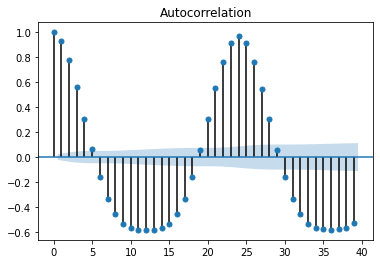

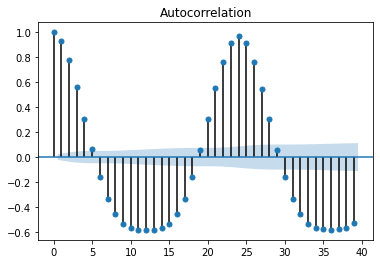

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# ACF is used to find value of q parameter and PACF is used to find value of p parameter.

plot_acf(df_train)  #q is 5,6 or 7

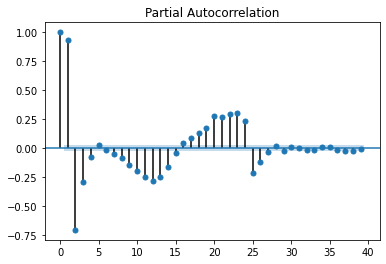

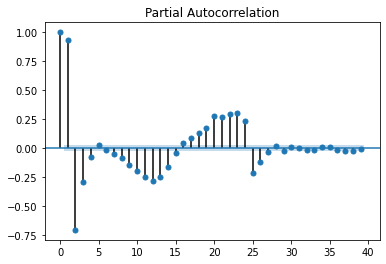

In [ ]:
plot_pacf(df_train)    # p is 4 or 6,7

In [ ]:
df.size

8760

In [ ]:
#df.dropna(inplace=True)
#print(df)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
df_model= ARIMA(df_train, order=(6,0,6))

#model used (5,0,5)= fit (82929.11327995255), sqrt (223.79595524689847)
#model used (5,0,6)= fit (81891.46207411952), sqrt (94.63445090046653)
#model used (5,0,7)= fit (81438.90854548245), sqrt (95.01832138828566)
#model used (5,1,5)= error
#model used (5,2,5)= fit (86169.42213691954), sqrt (246.40659705705346)
#model used (5,1,6)= fit (82153.29256839116), sqrt (142.09844754206722)
#model used (5,2,6)= error
#model used (5,1,7)= error
#model used (5,2,7)= error
#model used (6,0,5)= error
#model used (6,0,6)= fit (81229.4886910156), sqrt (91.04655400384654)
#model used (6,0,7)= error
#model used (6,1,5)= fit (82214.17388241683), sqrt (150.1434462368575)
#model used (6,2,5)= fit (86175.93209726347), sqrt (246.36356853334027)
#model used (6,1,6)= fit (82214.19666240251), sqrt (150.44777532756711)
#model used (6,2,6)= error
#model used (6,1,7)= fit (82202.5955960795), sqrt (78.22457944012746)
#model used (6,2,7)= error


In [ ]:
df_model_fit= df_model.fit()

In [ ]:
df_model_fit.aic

81229.4886910156

In [ ]:
df_forecast = df_model_fit.forecast(steps=1260)[0]
df_forecast

array([780.59570954, 736.58325658, 638.95407644, ...,  10.25579104,
        56.70941315,  94.60244249])

In [ ]:
df_test

,Time Zone
7502,776
7503,738
7504,629
7505,456
7506,255
...,...
8757,0
8758,0
8759,0
8760,0


In [ ]:
np.sqrt(mean_squared_error(df_test,df_forecast))

91.04655400384654